This model is from  the paper [Modeling cell-death patterning during biofilm formation](https://iopscience.iop.org/article/10.1088/1478-3975/10/6/066006). This paper described a model for biofiolm growth, however it but didn't provide any code used to simulate the results. Therefore, the work here will attempt to recreate what was done in the paper.

*Note: The information and ideas here are from the paper cited. I have attempted to summarise the text and equations from the paper in my own words. The simulations and code are the only thing not from the original paper.*

# Introduction
The model captures biofilm growth by considering the interaction between *Bacillus* cells and the extracellular matrix (ECM) that they produce. Previous research has shown that the ECM inhibits cell movement, and thus can lead to areas of higher density. The variation in cell density is believed to cause a heterogeneous cell-death pattern, which ultimatley leads to wrinkle formation. 

This model assumes all cells are motile and become imotile due to high levels of ECM.

# The Model
The overall model has the general form:
\begin{align}
    \frac{\partial\rho}{\partial t} =&\ Birth\ -\ Death\ -\ Density\ Dependent\ Dispersal\\
    \frac{\partial E}{\partial t} =&\ Production\ -\ Degradation\ -\ Diffusion\\
    \label{eq:0.1}\tag{0.1}
\end{align}
Where:
 - $\rho$ , density of cells.
 - $E$ , ECM concentration.
 
### Cell Birth and Death
This model implements a simple model for general population dynamics of cells in nutrient-rich medium:
\begin{align}
      \frac{\partial\rho}{\partial t} = \alpha\rho\left(1-\frac{\rho}{\rho_0}\right)
\label{eq:1.1}\tag{1.1}
\end{align}
Where:
 - $\rho$ , density of cells.
 - $\alpha$ , maximum growth rate.
 - $\rho_0$ , maximum density of cells.
     
### Cell Density Dependent Dispersal
This model will use a fluid mechanic approach, therefore cell movement will be considered as a flux, $j$. Cells can either move passively or activley. 
1. Passive movement of cells due to cell density, :
    \begin{align}
      j = -D \nabla \rho
    \label{eq:2.1}\tag{2.1}
    \end{align}
    Where:
     - $j$ , cell flux
     - $D$ , diffusivity of cells.
     - $\rho$ , density of cells.
     
     <span style="color:gray">This equation is intuative, cells will move from areas of high density to low density at a speed of their diffusivity.</span>
     
     
2. Active movement of cells based on the run and tumble model:
    \begin{align}
      V = -v \tau \nabla v
    \label{eq:2.2}\tag{2.2}
    \end{align}
    Where:
     - $V$ , effective drift velocity.
     - $v$ , local run speed.
     - $\tau$ , time between tumbles.
     
     <span style="color:gray">This equation is not intuative, equation suggests cells move from fast moving areas to slow moving areas.</span>
     
     
3. Diffusivity based on run and tumble mechanics:
    \begin{align}
      D = \frac{ v^2 \tau }{ N_d }
    \label{eq:2.3}\tag{2.3}
    \end{align}
    Where:
     - $D$ , diffusivity of cells.
     - $v$ , local run speed.
     - $\tau$ , time between tumbles.
     - $N_d$ , dimensionality.
     
     <span style="color:gray">This equation is not intuative, but there is probably a probablistic derivation of it. I am unsure what dimensitionalty means.</span>


4. Overall cell flux:
    \begin{align}
      j = -v^2\tau\nabla\rho-v\tau\rho\nabla v
    \label{eq:2.4}\tag{2.4}
    \end{align}
    Where:
     - $j$ , cell flux
     - $v$ , local run speed.
     - $\tau$ , time between tumbles.
     - $\rho$ , density of cells.
     
     <span style="color:gray">This equation suggests cells will move like; high density -> low density, high speed -> low speed.</span>     
     
     
5. Cell speed is dependent on ECM concentration:
    \begin{align}
      \overrightarrow{V}(E) = -D'(E)\nabla E
    \label{eq:2.5}\tag{2.5}
    \end{align}
    Where:
     - $\overrightarrow{V}$ , ECM dependent drift velocity.
     - $D$ , diffusivity of cells.
     - $E$ , ECM concentration.
     
     <span style="color:gray">This equation suggests cells will move like; high density -> low density, high speed -> low speed.</span>     
   
   
6. Modified overall cell flux:
    \begin{align}
      j = -D(E)\nabla\rho + \rho\overrightarrow{V}(E)
    \label{eq:2.6}\tag{2.6}
    \end{align}
    Where:
     - $j$ , cell flux.
     - $D$ , diffusivity of cells.
     - $E$ , ECM concentration.
     - $\rho$ , density of cells.
     - $\overrightarrow{V}$ , ECM dependent drift velocity.
     
### ECM Production
This model ignores the geometry and mechanical properties of the ECM. Its production will be modelled as hill function up to some optimum bacterial density $\rho_k$:
\begin{align}
    \frac{\partial E}{\partial t} = \mu \left( \frac{ \left(\frac{\rho}{\rho_k}\right)^n }{ 1+\left(\frac{\rho}{\rho_k}\right)^n } \right)
\label{eq:3.1}\tag{3.1}
\end{align}
Where:
 - $E$ , ECM concentration.
 - $\mu$ , asymptotic ECM production rate.
 - $\rho$ , cell density.
 - $\rho_k$ , bacterial density at which ECM production is maximal.
 - $n$ , hill function coefficient.
     
### ECM Degradation and Dilution
Degradation and dilution of ECM will be done passively at the rate $\beta$ and $d_E$ respectivley:
\begin{align}
    \frac{\partial E}{\partial t} = -\beta E + d_E \nabla ^2 E
\label{eq:4.1}\tag{4.1}
\end{align}
Where:
 - $E$ , ECM concentration.
 - $\beta$ , decay rate of ECM.
 - $d_E$ , diffusivity of ECM.

## Overall Model
Combining all of these components gives the overall model
\begin{align}
    \frac{\partial\rho}{\partial t} =&\ 
    \alpha\rho\left(1-\frac{\rho}{\rho_0}\right)\ +\ 
    \nabla.\left( \left( D(E)\nabla\rho \right) -\rho\overrightarrow{V}(E) \right)\\
    \frac{\partial E}{\partial t} =&\ 
    \mu \left( \frac{ \left(\frac{\rho}{\rho_k}\right)^n }{ 1+\left(\frac{\rho}{\rho_k}\right)^n } \right)\ -\ 
    \beta E\ +\ 
    d_E \nabla^2E\\
    \label{eq:5.1}\tag{5.1}
\end{align}

The relationship between ECM concentration and immotility is unknown, this model assumes this relationship is exponential:
\begin{align}
    D(E) = D_0 e^{pE}\\
    \label{eq:5.2}\tag{5.2}
\end{align}
Where:
 - $D$ , diffusivity of cells.
 - $D_0$ , free diffusion coefficient of cells in ECM.
 - $p$ , dimension of inverse concentration ???.
 - $E$ , ECM concentration.

## Dimensionless Model
Converting the model into a general non-dimensional form is usefull for comparing different experiments. 

The current units of the model are:
- Time , $hrs$.
- Length , $\mu m$.
- Bacterial density , (cell number) $\mu m^{-2}$.
- Bacteria growth rate , $1(h)^{-1}$.
- Bacteria diffusion coefficent , $(\mu^2)/(h)^{-1}$.
- ECM concentration , (ECM number) $\mu m^{-2}$.
- ECM production rate , $(\mu^{-2})(h^{-1})$
- ECM degrdation rate , $1(h)^{-1}$.

The variables and parameters of the model will be converted into a non-dimensional form, and have the description:
- Bacterial cell density , $u = \frac{\rho}{\rho_0}$.
- Optimum bacterial cell density , $u_k = \frac{\rho_k}{\rho_0}$.
- ECM density , $w = pE$.
- Time , $t' = \alpha t$.
- Production rate of ECM , $\sigma = \frac{p\mu}{\alpha}$.
- Degradation rate of ECM , $\gamma = \frac{\beta}{\alpha}$.
- Ratio of diffusion coefficients , $d = \frac{d_E}{D_0}$.
- $\tilde{r} = r\left(\frac{\alpha}{D_0}\right)^{\frac{1}{2}}$.

This gives the following:
\begin{align}
    \frac{\partial u}{\partial t'} =&\ 
    u(1-u)\ +\ 
    \nabla.\left( D(w)\left( \nabla u - u \nabla w \right) \right)\\
    \frac{\partial w}{\partial t'} =&\ 
    \sigma \left( \frac{ \left(\frac{u}{u_k}\right)^n }{ 1+\left(\frac{u}{u_k}\right)^n } \right)\ -\ 
    \gamma w\ +\ 
    d \nabla^2w\\
    \label{eq:6.1}\tag{6.1}
\end{align}

The model can be simplified futher by defining the following functions:
\begin{align}
    f(u) =& u(1-u) \\
    g(u,w) =& \sigma \left( \frac{ \left(\frac{u}{u_k}\right)^n }{ 1+\left(\frac{u}{u_k}\right)^n } \right) - \gamma w \\
    D(w) =& e^{-w}\\
    \label{eq:6.2}\tag{6.2}
\end{align}

This gives the following:
\begin{align}
    \frac{\partial u}{\partial t'} =& f(u) + \nabla.\left( e^{-w}\left( \nabla u - u \nabla w \right) \right)\\
    \frac{\partial w}{\partial t'} =& g(u,w) + d \nabla^2w\\
    \label{eq:6.3}\tag{6.3}
\end{align}

# Model Analysis
## Steady State Solutions
The fixed points of the system of the system, $u_s, w_s$, can be found by $f(u_s) = g(u_s, w_s) = 0$.
\begin{align}
    f(u) =& u(1-u)\\
    f(u_s) =& 0\\
    \implies u_s =& 0,1\\
    \\
    g(u,w) =& \sigma \left( \frac{ \left(\frac{u}{u_k}\right)^n }{ 1+\left(\frac{u}{u_k}\right)^n } \right) - \gamma w\\ 
    g(u_s,w_s) =& 0\\
    u_s=0\implies w_s=0 \quad & \quad u_s=1\implies w_s = \frac{\sigma}{\gamma} \left( \frac{ \left(\frac{1}{u_k}\right)^n }{ 1+\left(\frac{1}{u_k}\right)^n } \right)
    \label{eq:7.1}\tag{7.1}
\end{align}
This result shows that the system has a zero steady state point, and a functional steady state point where the bacterial growth rate is maximal. 

## Stability Analysis

## Phase-Field Analysis
The phase-field method can be used to numerically solve the dimensionless model; Eq 6.3. This method is useful for solving the sytem in a circular geometry. 

First, the system must be constrained to the circular geometry by using a phase-field variable;
\begin{align}
    \phi(r)=\frac{1}{2} + \frac{1}{2} tanh\left(\frac{r_0-r}{\xi}\right)
    \label{eq:8.1}\tag{8.1}
\end{align}
Where:
- $r$ , radius.
- $r_0$ , radius of boundary.
- $\xi$ , thickness of diffusive boundary.
[This paper](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.68.037702) shows that the correct boundary conditions can be derived buy taking the limit $\xi\to 0$. This phase-field variable is then multiplied with cell density and ECM to constrain them. Resulting in:
\begin{align}
    \frac{\partial(\phi\rho)}{\partial t} =&\ 
    \phi\alpha\rho\left(1-\frac{\rho}{\rho_0}\right)\ +\ 
    \nabla.\phi\left( \left( D(E)\nabla\rho \right) -\rho\overrightarrow{V}(E) \right)\\
    \frac{\partial (\phi E)}{\partial t} =&\ 
    \phi\mu \left( \frac{ \left(\frac{\rho}{\rho_k}\right)^n }{ 1+\left(\frac{\rho}{\rho_k}\right)^n } \right)\ -\ 
    \phi\beta E\ +\ 
    \nabla.\phi \left( d_E \nabla E \right)\\
    \label{eq:8.2}\tag{8.2}
\end{align}

And the dimensionless form:
\begin{align}
    \frac{\partial u}{\partial t'} =& f(u) + \nabla.\left( e^{-w}\left( \nabla u - u \nabla w \right) \right)  +  \left( e^{-w}\left( \nabla u - u \nabla w \right) \right)\frac{\nabla\phi}{\phi}\\
    \frac{\partial w}{\partial t'} =& g(u,w) + d \nabla^2w + d\nabla w \frac{\nabla\phi}{\phi}\\
    \label{eq:8.3}\tag{8.3}
\end{align}

Apparently equations 8.3 can be "solved on a regular cubiv grid in a computation box that surrounds the circular domain of interest".

I think this can just be solved numerically with the right starting conditions. There aren't too many variables, the equations are just long. Plan:
 - Define a function of the system
     - Be careful with x,y,z componenets of each species, try to make it work with any amount of dimensions
     - Maybe make a functions like; fun(u, w). Then make a wrapper function that determines the amount of dimensions; fun_wrap(ux, uy, wx, wy). This way the interface of the ode solver is the same.
 - The phase-field function can be presolved.
 - Define functions for f, g, D, for neatness
 - Define and CHECK div and grad functions. 
 - Also integrate "dead cells ODE" $\frac{d(u_d)}{dt} = u^2 - \gamma_d*u_d$.

# Modelling
For now this system will aim to be modelled:
\begin{align}
    \frac{\partial u}{\partial t'} =& f(u) + \nabla.\left( e^{-w}\left( \nabla u - u \nabla w \right) \right)\\
    \frac{\partial w}{\partial t'} =& g(u,w) + d \nabla^2w\\
\end{align}
We will start with a simplier version, then slowly add terms. To begin lets look at cell birth and death (no ECM production):
\begin{align}
    \frac{\partial u}{\partial t'} =& f(u) = u(1-u)\\
    \frac{\partial w}{\partial t'} =& 0 \\
\end{align}

In [1]:
import numpy as np
from sim_lib import *
from sim_lib_model1 import *

MovieWriter stderr:
av_interleaved_write_frame(): No space left on device
Error writing trailer of CellDeathModelOne.gif: No space left on device
Error closing file CellDeathModelOne.gif: No space left on device



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1600x900', '-pix_fmt', 'rgba', '-r', '20', '-loglevel', 'error', '-i', 'pipe:', '-filter_complex', 'split [a][b];[a] palettegen [p];[b][p] paletteuse', '-y', 'CellDeathModelOne.gif']' returned non-zero exit status 1.

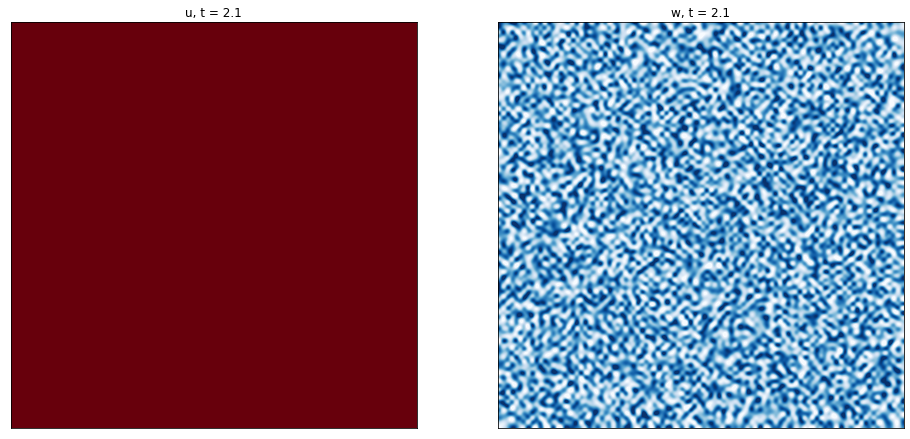

In [2]:
sim = CellDeathModelOne()
sim.gif_simulation()